Hypothesis of model X: [[ 1.14532413e-14 -9.99101282e-02  9.07692728e-02  2.10137711e-01
   2.28319098e-04  4.33217839e-02  1.36344955e-01  9.18077522e-02
   3.64718515e-02  3.66556278e-01  1.77487622e-01  1.03989528e-01
   2.79295534e-01  8.32118559e-03  5.74926804e-02 -4.21802769e-02]]
Hypothesis of model X_1: [[1.14075307e-14 7.02003327e-01]]
Final cost after GD for model_x:  0.17324362743356628
Final cost after GD for model_x1:  0.25356165910376166
MSE for model_x: [[0.34648725]]
MSE for model_x1: [[0.50712332]]


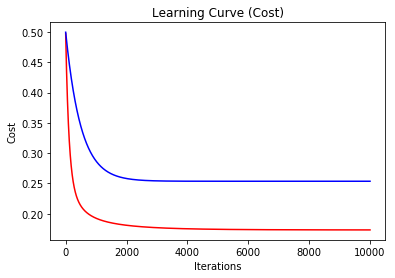

In [26]:
#question a and b 
#BY: Enlin Chen, B00725769

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#cost function 
def Cost(X,y,theta):
    sum_cost = np.power(((X @ theta.T)-y),2)
    return np.sum(sum_cost)/(2 * len(X))

#Gradient descent is an optimization algorithm used to 
#find the values of parameters (coefficients) of a function (f) 
#that minimizes a cost function (cost).
def gradientDescent(X,y,theta,iters,lr):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (lr/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = Cost(X, y, theta)
    return theta,cost

def MSE(Y, Y_pred):
    mse = ((Y - Y_pred) ** 2)
    return mse

#load the .csv file 
d = pd.read_csv('houses.csv')
#store the date into dataframe
df = pd.DataFrame(data = d)
#normalize the data to prevent 'dominated field'
df = (df - df.mean())/df.std()
#setting that 15 cols features as matrixes X
X = df.iloc[:,1:16]
#'sqft_living'
X_1 = df.iloc[:,3:4]
#column for gradient descent
ones = np.ones([X.shape[0],1])
ones_1 = np.ones([X_1.shape[0],1])
#add a column of 1s for gradient descent
X = np.concatenate((ones,X),axis=1)
X_1 = np.concatenate((ones_1,X_1),axis=1)
y = df.iloc[:,0:1].values

theta = np.zeros([1,16])
theta_1 = np.zeros([1,2])

#set hyper parameters
alpha = 0.001 #learning rate: 10, 1, 0.1, 0.01, 0.001
iters = 10000

model_x,cost_history = gradientDescent(X,y,theta,iters,alpha)
print("Hypothesis of model X:", model_x)

model_x1,cost_history_1 = gradientDescent(X_1,y,theta_1,iters,alpha)
print("Hypothesis of model X_1:", model_x1)

fCost = Cost(X,y,model_x)
print("Final cost after GD for model_x: ", fCost) 
#Final cost after GD:  0.17324362743356628 (lr=0.001)
#Final cost after GD:  0.17317164314616262 (lr=0.01)
#Final cost after GD:  0.17317164314616262 (lr=0.1)
#Final cost after GD:  nan (lr=1)
#Final cost after GD:  nan (lr=10)

fCost_1 = Cost(X_1,y,model_x1)
print("Final cost after GD for model_x1: ", fCost_1) 
#Final cost after GD:  0.25356165910376166 (lr=0.001)
#Final cost after GD:  0.2535616586004531 (lr=0.01)
#Final cost after GD:  0.2535616586004531 (lr=0.1)
#Final cost after GD:  0.25356165860045304 (lr=1)
#Final cost after GD:  nan (lr=10)

fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost_history, 'r')  
ax.plot(np.arange(iters), cost_history_1, 'b')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Learning Curve (Cost)')  

#prediction base on model X
array = []
for i in range(len(X)):
    pre = X[i:i+1,:].dot(model_x.T)
    array.append(pre)
Y_prediction_x = np.array(array)

#prediction base on model X_1
array_1 = []
for i in range(len(X)):
    Y_pred_x1 = X_1[i:i+1,:].dot(model_x1.T)
    array_1.append(Y_pred_x1)
Y_prediction_x1 = np.array(array_1)

#calculating MSE for model_x
fMSE = 0  
for i in range(len(y)):
    mse = MSE(y[i],Y_prediction_x[i])
    fMSE += mse
    
fMSE = fMSE/len(y)
print ("MSE for model_x:", fMSE) #MSE for model_x: [[0.34648725]]

#calculating MSE for model_x1
fMSE_x1 = 0  
for i in range(len(y)):
    mse_1 = MSE(y[i],Y_prediction_x1[i])
    fMSE_x1 += mse_1
    
fMSE_x1 = fMSE_x1/len(y)
print ("MSE for model_x1:", fMSE_x1) #MSE for model_x1: [[0.50712332]]


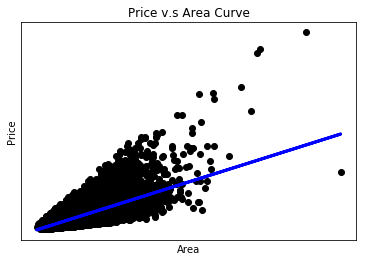

In [27]:
#question c: Visualize the best-obtained model for X_1 using a scatter plot 
#to show price vs area and plot the linear model. (Same for model X)
#BY: Enlin Chen, B00725769
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#cost function 
def Cost(X,y,theta):
    sum_cost = np.power(((X @ theta.T)-y),2)
    return np.sum(sum_cost)/(2 * len(X))

#Gradient descent is an optimization algorithm used to 
#find the values of parameters (coefficients) of a function (f) 
#that minimizes a cost function (cost).
def gradientDescent(X,y,theta,iters,lr):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (lr/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = Cost(X, y, theta)
    return theta,cost

def MSE(Y, Y_pred):
    mse = ((Y - Y_pred) ** 2)
    return mse

#load the .csv file 
d = pd.read_csv('houses.csv')
#store the date into dataframe
df = pd.DataFrame(data = d)
#normalize the data to prevent 'dominated field'
df = (df - df.mean())/df.std()
#setting that 15 cols features as matrixes X
X = df.iloc[:,1:16]
#'sqft_living'
X_1 = df.iloc[:,3:4]

ones = np.ones([X.shape[0],1])
ones_1 = np.ones([X_1.shape[0],1])

#add a column of 1s for gradient descent
X = np.concatenate((ones,X),axis=1)
X_1 = np.concatenate((ones_1,X_1),axis=1)
y = df.iloc[:,0:1].values

theta = np.zeros([1,16])
theta_1 = np.zeros([1,2])

#set hyper parameters
alpha = 0.001 #learning rate: 10, 1, 0.1, 0.01, 0.001
iters = 10000

model_x,cost_history = gradientDescent(X,y,theta,iters,alpha)
model_x1,cost_history_1 = gradientDescent(X_1,y,theta_1,iters,alpha)

#prediction base on model X
array = []
for i in range(len(X)):
    pre = X[i:i+1,:].dot(model_x.T)
    array.append(pre)
Y_prediction_x = np.array(array)

#prediction base on model X_1
array_1 = []
for i in range(len(X)):
    Y_pred_x1 = X_1[i:i+1,:].dot(model_x1.T)
    array_1.append(Y_pred_x1)
Y_prediction_x1 = np.array(array_1)

#'sqft_living' for model_x1
X_1_x = df.iloc[:,3:4]
X1_test = X_1_x[:]

y_test = y[:]
y_test = np.reshape(y_test, len(y_test))
X_test = df.iloc[:,1:16]

#prediction of model x1
Y_prediction_x1.resize(len(Y_prediction_x1),1)
Y_prediction_x1 = np.reshape(Y_prediction_x1,len(Y_prediction_x1))
#prediction of model x
Y_prediction_x.resize(len(Y_prediction_x),1)
Y_prediction_x = np.reshape(Y_prediction_x,len(Y_prediction_x))

# Plot outputs
fig1, ax1 = plt.subplots() 
plt.scatter(X1_test, y_test,  color='black')
plt.plot(X1_test, Y_prediction_x1, color='blue',linewidth=3)
#plt.plot(X_test, Y_prediction_x, color='red',linewidth=3)
ax1.set_xlabel('Area')  
ax1.set_ylabel('Price')  
ax1.set_title('Price v.s Area Curve')  
plt.xticks(())
plt.yticks(())
plt.show()

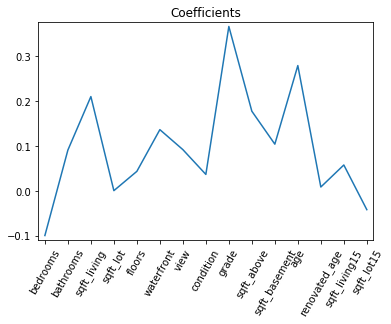

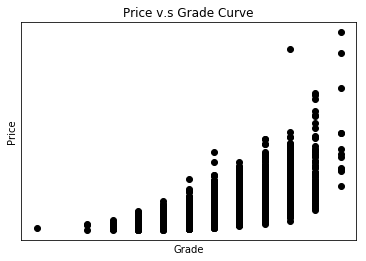

In [28]:
#question c: Visualize the best-obtained model for X_1 using a scatter plot 
#to show price vs area and plot the linear model. (Same for model X)
#BY: Enlin Chen, B00725769
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#cost function 
def Cost(X,y,theta):
    sum_cost = np.power(((X @ theta.T)-y),2)
    return np.sum(sum_cost)/(2 * len(X))

#Gradient descent is an optimization algorithm used to 
#find the values of parameters (coefficients) of a function (f) 
#that minimizes a cost function (cost).
def gradientDescent(X,y,theta,iters,lr):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (lr/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = Cost(X, y, theta)
    return theta,cost

def MSE(Y, Y_pred):
    mse = ((Y - Y_pred) ** 2)
    return mse

#load the .csv file 
d = pd.read_csv('houses.csv')
#store the date into dataframe
df = pd.DataFrame(data = d)
#normalize the data to prevent 'dominated field'
df = (df - df.mean())/df.std()
#setting that 15 cols features as matrixes X
X = df.iloc[:,1:16]

#'sqft_living'
X_1 = df.iloc[:,3:4]

ones = np.ones([X.shape[0],1])
ones_1 = np.ones([X_1.shape[0],1])

#add a column of 1s for gradient descent
X = np.concatenate((ones,X),axis=1)
X_1 = np.concatenate((ones_1,X_1),axis=1)
y = df.iloc[:,0:1].values

theta = np.zeros([1,16])
theta_1 = np.zeros([1,2])

#set hyper parameters
alpha = 0.001 #learning rate: 10, 1, 0.1, 0.01, 0.001
iters = 10000

model_x,cost_history = gradientDescent(X,y,theta,iters,alpha)
model_x1,cost_history_1 = gradientDescent(X_1,y,theta_1,iters,alpha)

#prediction base on model X
array = []
for i in range(len(X)):
    pre = X[i:i+1,:].dot(model_x.T)
    array.append(pre)
Y_prediction_x = np.array(array)

#prediction base on model X_1
array_1 = []
for i in range(len(X)):
    Y_pred_x1 = X_1[i:i+1,:].dot(model_x1.T)
    array_1.append(Y_pred_x1)
Y_prediction_x1 = np.array(array_1)

#'sqft_living' for model_x1
X_1_x = df.iloc[:,3:4]
X1_test = X_1_x[:]

y_test = y[:]
y_test = np.reshape(y_test, len(y_test))
X_test = df.iloc[:,1:16]

#prediction of model x1
Y_prediction_x1.resize(len(Y_prediction_x1),1)
Y_prediction_x1 = np.reshape(Y_prediction_x1,len(Y_prediction_x1))
#prediction of model x
Y_prediction_x.resize(len(Y_prediction_x),1)
Y_prediction_x = np.reshape(Y_prediction_x,len(Y_prediction_x))

#In order to visualize the best_obtained model for model_x
#We need to find out the most important variable terms of predicting price
#and use that variable to draw the best-obtained model 
df_1 = df.drop(['price (grands)'],axis=1)
colnames = df_1.columns
#coefficients of model_X
coef = model_x[0]
plt.title("Coefficients")
plt.plot(range(len(colnames)), coef[1:16])
plt.xticks(range(len(colnames)), colnames.values, rotation=60) 
plt.margins(0.02)
plt.show()
#redefine X_test after we find the most important variable
X_test = df.iloc[:,9:10]

# Plot outputs
fig1, ax1 = plt.subplots() 
plt.scatter(X_test, y_test,  color='black')
#plt.plot(X1_test, Y_prediction_x1, color='blue',linewidth=3)
#plt.plot(X_test, Y_prediction_x, color='red',linewidth=3)
ax1.set_xlabel('Grade')  
ax1.set_ylabel('Price')  
ax1.set_title('Price v.s Grade Curve')  
plt.xticks(())
plt.yticks(())
plt.show()

Hypothesis of model X: [[ 1.04240273e-14 -7.41853546e-02  8.54909202e-02  1.97733654e-01
  -8.75374277e-04  4.14661424e-02  1.26638822e-01  9.93776254e-02
   4.12623605e-02  3.11618654e-01  1.65851435e-01  1.00020545e-01
   2.28407820e-01  2.06940266e-02  8.04875524e-02 -3.49848270e-02]]
Hypothesis of model X_1: [[1.03805804e-14 6.38200402e-01]]
Final cost after GD for model_x:  2.8057085890153495
Final cost after GD for model_x1:  0.5132344903451957
MSE for model_x: [[0.35054097]]
MSE for model_x1: [[0.51119799]]


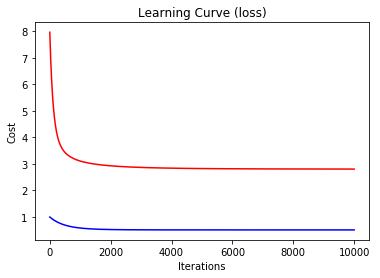

In [29]:
#question d (gradient decsent with ridge regression)
#BY: Enlin Chen, B00725769

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#cost function 
def Cost(X,y,theta,l2_pen):
    sum_cost = np.power(((X @ theta.T)-y + (l2_pen*theta)),2)
    return np.sum(sum_cost)/(2 * len(X))

#Gradient descent is an optimization algorithm used to 
#find the values of parameters (coefficients) of a function (f) 
#that minimizes a cost function (cost).
def gradientDescentwithD(X,y,theta,iters,lr,l2_pen):
    cost = np.zeros(iters)
    for i in range(iters):
        #add the penalty term 
        theta = theta - (lr/len(X)) * np.sum(X * (X @ theta.T - y) + (l2_pen*theta), axis=0)
        cost[i] = Cost(X, y, theta,l2_pen)
    return theta,cost

def MSE(Y, Y_pred):
    mse = ((Y - Y_pred) ** 2)
    return mse

#load the .csv file 
d = pd.read_csv('houses.csv')
#store the date into dataframe
df = pd.DataFrame(data = d)
#normalize the data to prevent 'dominated field'
df = (df - df.mean())/df.std()
#setting that 15 cols features as matrixes X
X = df.iloc[:,1:16]
#'sqft_living'
X_1 = df.iloc[:,3:4]

ones = np.ones([X.shape[0],1])
ones_1 = np.ones([X_1.shape[0],1])

#add a column of 1s for gradient descent
X = np.concatenate((ones,X),axis=1)
X_1 = np.concatenate((ones_1,X_1),axis=1)
y = df.iloc[:,0:1].values

theta = np.zeros([1,16])
theta_1 = np.zeros([1,2])

#set hyper parameters
alpha = 0.001 #learning rate: 10, 1, 0.1, 0.01, 0.001
iters = 10000

#L2 Penalty
l2_pen = 0.1

model_x,cost_history = gradientDescentwithD(X,y,theta,iters,alpha,l2_pen )
print("Hypothesis of model X:", model_x)

model_x1,cost_history_1 = gradientDescentwithD(X_1,y,theta_1,iters,alpha,l2_pen )
print("Hypothesis of model X_1:", model_x1)

fCost = Cost(X,y,model_x,l2_pen)
print("Final cost after GD for model_x: ", fCost) 
#Final cost after GD:  0.17363863831309137 (lr=0.001)

fCost_1 = Cost(X_1,y,model_x1,l2_pen)
print("Final cost after GD for model_x1: ", fCost_1) 
#Final cost after GD:  0.25356165910376166 (lr=0.001)

fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost_history, 'r')  
ax.plot(np.arange(iters), cost_history_1, 'b')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Learning Curve (loss)')  

#prediction base on model X
array = []
for i in range(len(X)):
    pre = X[i:i+1,:].dot(model_x.T)
    array.append(pre)
Y_prediction_x = np.array(array)

#prediction base on model X_1
array_1 = []
for i in range(len(X)):
    Y_pred_x1 = X_1[i:i+1,:].dot(model_x1.T)
    array_1.append(Y_pred_x1)
Y_prediction_x1 = np.array(array_1)

#calculating MSE for model_x
fMSE = 0  
for i in range(len(y)):
    mse = MSE(y[i],Y_prediction_x[i])
    fMSE += mse
    
fMSE = fMSE/len(y)
print ("MSE for model_x:", fMSE) #MSE for model_x: [[0.34648725]]

#calculating MSE for model_x1
fMSE_x1 = 0  
for i in range(len(y)):
    mse_1 = MSE(y[i],Y_prediction_x1[i])
    fMSE_x1 += mse_1
    
fMSE_x1 = fMSE_x1/len(y)
print ("MSE for model_x1:", fMSE_x1) #MSE for model_x1: [[0.50712332]]

In [69]:
#question 2 
import lea

alternatorBRK = lea.event(1/1000)

FanBeltBRK = lea.event(2/100)

BatteryCHG = lea.joint(alternatorBRK,FanBeltBRK).switch({ (True ,True ) : lea.event(0),
                                                (True ,False) : lea.event(0),
                                                (False,True ) : lea.event(0),
                                                (False,False) : lea.event(995/1000) })

Flat = BatteryCHG.switch({ True  : lea.event(10/100),
                            False : lea.event(90/100) })

Start = Flat.switch({ True  : lea.event(0/100), #professor remove the gas and starter conditions
                            False : lea.event(100/100) }) # since only depends on the 'FLAT' condition.

#(b)What is the probability that the alternator is broken given that the car won’t start? 
# P(AlternatorBRK = True | Start = False) = 0.007456498786081997
print(alternatorBRK.given(~Start))

#(c)What is the probability that the fan belt is broken given that the car won’t start? 
# P(FanBeltBRK = True | Start = False) = 0.8070623482602496
print(BatteryCHG.given(~Start))

#(d)What is the probability that the fan belt is broken given that the car won’t start and the alternator is broken?
# P(FanBeltBRK = True | Start = False & AlternatorBRK = True) = 0.0
print(BatteryCHG.given(~Start & alternatorBRK))

#(e)What is the probability that the alternator and the fan belt is broken given that the car won’t start? 
# P(FanBeltBRK = True & AlternatorBRK = True | Start = False) = 0.0
print((BatteryCHG & alternatorBRK).given(~Start)) 

False : 0.992543501213918
True  : 0.007456498786081997
False : 0.19293765173975033
True  : 0.8070623482602496
False : 1.0
False : 1.0
